# A meditation on sympy

I'm interested in the idea of working upper level undergraduate physics problems (including those which are not explicitly numerical) on a computer. This runs counter to the way we typically approach teaching this material, but if I'm honest, that's part of why I find it intriguing.

To better see what some of the issues are, I thought I'd work through a few problems in `sympy`. Since I'm teaching Electricity and Magnetism this fall, I thought I'd work some problems involving vector calculus (though the three I ended up doing below are much more vector than calculus). I sourced the problems from   [**div grad curl and all that** by h. m. schey](https://www.amazon.com/Div-Grad-Curl-All-That/dp/0393925161/), which I've used in the past to cover the mathematical preliminaries in this course.

As I worked through the problems, it occurred to me that there are really three types of problems that we give students in upper level undergraduate physics courses:
1. "Straightforward calculation" problems, which could more appropriately be called exercizes, are the least complicated. They exist to give students an opportunity to develop skill in applying a new mathematical technique.
2. "Show that..." problems, which which ask students to work through the steps of a derivation, but with a known endpoint.
3. "Derive..." problems, which take the training wheels off, and ask students to perform a derivation without knowing where they're headed.

Interestingly, the conceptual questions that we ask students in entry level classes are almost entirely absent in the upper level curriculum. I'm not sure if this is because we think they understand the concepts already, or because we think they will make the leap between mathematical and conceptual understanding on their own. Either way, I'm not sure that the assumption is entirely justified.

What follows are three problems (one from each category). I've intentionally done some things in my solutions that are suboptimal, specifically to show that (and how) they are suboptimal. If you see any that I don't explicitly call out, please let me know.

If you're not interested in the details of how to solve these problems, you can [skip to the commentary](#commentary).

## Problemata

Schey derives an expression for the unit normal to a surface: $$ \mathbf{\hat n} = {-\mathbf{i}{\partial f\over\partial x} - \mathbf{j}{\partial f \over \partial y} + \mathbf{k} \over \sqrt{1 + \left({\partial f\over \partial x}\right)^2 + \left({\partial f \over \partial y}\right)^2}},$$
assuming that we can define the surface in terms of $z = f(x,y)$.

To cement this idea, he gives the following exercise:

### Problem II-1
Find a unit vector normal to each of the following surfaces:
1. $z = 2 - x - y$
2. $z = \left(x^2+y^2\right)^{1/2}$
3. $z = \left(1-x^2\right)^{1/2}$
4. $z = x^2 + y^2$
5. $z = \left(1 - x^2/a^2 - y^2/a^2\right)^{1/2}$
---
#### Solution:

This is a type 1 (practice) problem. Working it in `sympy` is pretty straightforward.

First, we import, and set up pretty-printing so that our results look like math instead of code.

In [1]:
import sympy as sp
sp.init_printing()

Any work in `sympy` requires some symbols. I won't use either $\hat{\mathbf{n}}$ or $z$ in producing my solution, but I will want them when I display results, so I'll make symbols for them, as well. Then, I just go through the operations required to produce $\hat{\mathbf{n}}$.

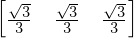

In [2]:
nhat, x, y, z = sp.symbols('nhat x y z')

f = 2 - x - y
dfdx = sp.diff(f, x)
dfdy = sp.diff(f, y)
norm = sp.sqrt(1 + dfdx**2 + dfdy**2)
sp.Matrix([[-dfdx, -dfdy, 1]])/norm

Since I'm going to do this multiple times, I'll write a python function to carry it out. Two notes:
* I think column vectors are easier to read than row vectors, so I'm going to make that the default output, and
* due to scoping rules, the assignment to `nhat` inside my function does not clobber the symbol I defined above.

In [3]:
def normalvec(f, rowvec=False):
    """finds a normal vector to the surface defined by z=f(x,y)."""
    dfdx = sp.diff(f, x)
    dfdy = sp.diff(f, y)
    norm = sp.sqrt(1 + dfdx**2 + dfdy**2)
    
    # this makes a row vector
    nhat = sp.Matrix([[-dfdx, -dfdy, 1]])/norm
    
    if rowvec:
        return nhat
    else:
        # returning the transpose makes it a column vector
        return nhat.T
    

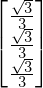

In [4]:
normalvec(f)

While that is correct, it is a terrible way to format the answer to a question. All I see is a bunch of numbers with no context or explanation, and since I'm working out normal vectors to several different surfaces, I'm likely to get confused.  Of course, ultimately this exercize is more about doing the calculation than it is about the result, but an important part of any calculation is thinking about how to communicate the results.

What does it take to make a nicely formatted answer?

I'd like to clearly show my starting point, what I'm calculating, and the result of the calculation. Ideally, it should be visually offset from the rest of the page, too, so that it is easier to see.  In this case, it should look something like this:

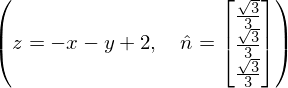

In [5]:
from IPython.display import display

display((sp.Eq(z, f, evaluate=False), sp.Eq(nhat, normalvec(f),
                                            evaluate=False)))

Not perfect, but better than what we had up above. I *could* put this inside my `normalvec` functon, but it's generally better practice to separate calculation and presentation; I may want to use `normalvec` in a different context later on. I'll write a separate function that does the calculation and displays it nicely, instead.

In [6]:
def solve_and_display(f):
    """Produce a nicely formatted answer to the question,
    What is \hat n if z=f(x,y)?
    
    """
    display((sp.Eq(z, f, evaluate=False), sp.Eq(nhat, normalvec(f),
                                                evaluate=False)))

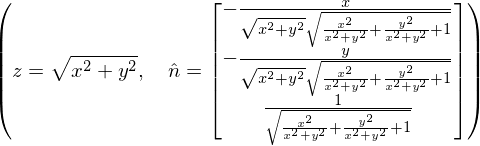

In [7]:
solve_and_display(sp.sqrt(x**2 + y**2))

This is ugly, and just looking at it, it should be relatively easy to simplify. Let's improve our display function. In addition to asking that the results be simplified, I'm going to split the action into more steps to increase readability and make future modifications easier.

In [8]:
def solve_and_display(f):
    """Produce a nicely formatted answer to the question,
    What is \hat n if z=f(x,y)?
    
    """
    starting_point = sp.Eq(z, f, evaluate=False)
    result = sp.Eq(nhat, sp.simplify(normalvec(f)), evaluate=False)
    
    display((starting_point, result))

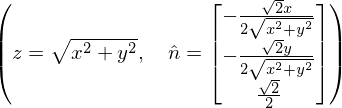

In [9]:
solve_and_display(sp.sqrt(x**2 + y**2))

Much cleaner.

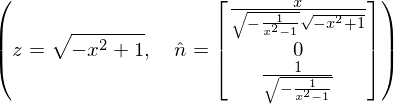

In [10]:
solve_and_display(sp.sqrt(1-x**2 ))

The $x$-component of this one can be simplified further, but only if $x<1$.  Since we haven't imposed that condition, `sympy` refuses to simplify. 

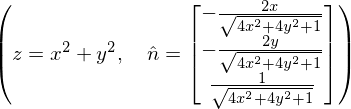

In [11]:
solve_and_display(x**2 + y**2)

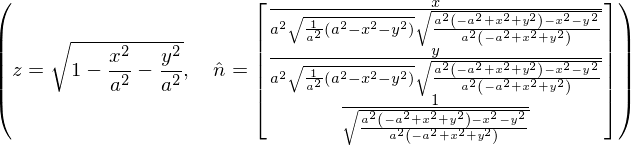

In [12]:
a = sp.symbols('a')
solve_and_display(sp.sqrt(1 - x**2/a**2 - y**2/a**2))

We can simplify a little by telling `sympy` that $a$ is positive, but to go further we would need to add the constraint that $a^2 > x^2 + y^2$. Putting an overall assumption (*e.g.*, $a$ is positive, or an integer) on a symbol is easy: you just apply that condition when you define it.

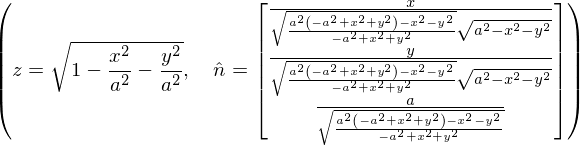

In [13]:
a = sp.symbols('a', positive=True)
solve_and_display(sp.sqrt(1 - x**2/a**2 - y**2/a**2))

Our (current) inability to impose constraints made a couple of these messier than they needed to be, but otherwise, this worked well.

#### Summary:
* If you're going to do something more than once, write a function to do it for you.
* Separate logic from presentation as much as possible.
* Making improvements (either to add functionality or to improve readability) is normal.
* Readability (both in code and in output) matters.
* Simplifying is nontrivial, and `sympy` is generally more cautious than a human would be.



----

----

### Problem II-2
Show that the vector normal to the plane $$ax + by + cz = d$$ is given by $$\hat{\mathbf{n}} = \pm\left( \mathbf{i}a + \mathbf{j}b + \mathbf{k}c\right)/\left( a^2 + b^2 + c^2\right)^{1/2}.$$

---
#### Solution:
This is a type 2 ("Manipulation" or "Show that...") problem. We need to demonstrate, through a series of operations, that our given input matches our desired output. As always, we need symbols. We saw above that we can run into difficulty simplifying if we don't impose the right assumptions, so let's do that from the beginning.

In [14]:
# the coefficients in our equation defining the plane are real and positive.
a,b,c,d = sp.symbols('a b c d', real=True, positive=True)

# x, y, z aren't necessarily positive, but coordinates should be real.
x,y,z = sp.symbols('x y z', real=True)

We're given the equation of a plane, so let's start with that.

In [15]:
sp.Eq(a*x + b*y + c*z, d)

We want to solve this for $z$, so we can apply the unit normal function that we used in problem II-1.  We ought to have `sympy` do this for us.

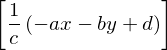

In [16]:
sp.solve(sp.Eq(a*x + b*y + c*z, d), z)

... but the output of `sympy.solve()` is a list of solutions (even though it has only one element; that's what the square brackets mean). We'll slice out that element and assign it to a variable. The most obvious choice is $z$, but we could go with anything we wanted. Again, printing an intermediate result shows us that we haven't made any coding mistakes so far.

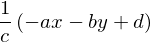

In [17]:
z = sp.solve(sp.Eq(a*x + b*y + c*z, d), z)[0]
z

Now, we have our surface defined in a form that will feed right into the function we defined for problem II-1, above. We could write it again, but it's easier just to reuse it.

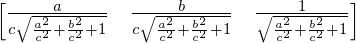

In [18]:
nhat = normalvec(z, rowvec=True)
nhat

This is the same (apart from simplification) as our desired result, but that may not be immediately obvious to everyone. We can check the equality of two expressions in three different ways. The first checks to see if they are syntactically identical (i.e., do they consist of the same set of symbols in the same order?). Due to the differences in simplification, we ought to fail this test.

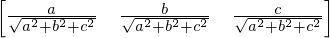

In [19]:
desired_result = sp.Matrix([[a, b, c]])/sp.sqrt(a**2 + b**2 + c**2)
desired_result

In [20]:
nhat == desired_result

False

As expected.

The second way to check equality is to subtract the two expressions and simplify, and see if we get zero. That ought to work.

In [21]:
sp.simplify(nhat-desired_result)

Since the difference is zero, the two expressions are equal.


The third way to check equality is to have `sympy` substitute in some numbers. Doing this well is complicated, and we don't need it here, so I'm not going to talk more about it at this time.


#### Summary:
* This process was almost entirely interactive.
* I reused an earlier tool (the function I wrote for problem II-1)
* I put less effort into formatting the output of each step, partly because I was working interactively, partly because I was only going through the process once, and partly because each step was small enough that I felt the code adequately documented the output.
* You have to think a little bit about how you test for equality.

----

----

### Problem II-3
Derive expressions for the unit normal vector for surfaces given by $y=g(x,z)$ and $x=h(y,z)$. Use each to rederive the normal to the plane found in problem II-2.

---
#### Solution:
The exact steps in any derivation will differ, but as is often the case in this kind of homework problem, we have a model laid out in the text. In this case you define two vectors that are tangent to the surface, take their cross product, and normalize. Since the cross product is orthogonal to the two vectors that went into it, the result will be orthogonal to the surface.

The two vectors are made by intersecting planes with the surface. Figures II-4 and II-5 in the text give the idea.

At this point, there are a couple of approaches. We have to work out derivations for two separate cases. We could either go ahead and do them separately, or we could try to code the method up in a general enough way so that it will work for both. There's nothing fundamentally wrong with the first approach, but it goes against the ethic of not repeating effort unless absolutely necessary. Also, the second approach, when done correctly, can demonstrate a deeper understanding of what's actually going on in the derivation. 

The approach I show below is written with my students as the intended audience. Since it requires a bit more python knowledge than they generally have, I spend time going through that slowly. 

Up until this point, we've only used `sympy` symbols that are variables. Now, we need functions.

In [22]:
from sympy import Function

We can define arbitrary functions with or without arguments in `sympy`. Since we know in advance what the arguments will be in this case, we can go ahead and include the arguments in the definition.

In [23]:
x,y,z = sp.symbols('x y z')

g = Function('g')(x, z)
h = Function('h')(y, z)

We're going to want to use a little bit of *introspection* to figure out what the arguments of each function are, so that we can treat $g(x,z)$ differently from $h(y,z)$. The most compact and efficient way to do this makes use of two `python` features you may not have seen, so I'll walk through the whole process slowly.

First of all, we need to know the arguments of a function. Fortunately, `sympy` functions provide this information.

In [24]:
g.args

The next thing we need is a *list comprehension*. Basically, it's a compact and efficient way to construct a list on the fly without explicitly writing loops.

Let's say I have a collection of coordinates, and I want to build a list that consists of some test or operation applied to each of those coordinates. In this case, the question I want to ask is, Is this coordinate present in the list of arguments to my function? Here I'm putting my coordinates in a tuple instead of a list (because tuples are immutable, and I don't want to be able to change my coordinates by accident) but either would work. 

In [25]:
coords = (x,y,z)

[coord in g.args for coord in coords]

[True, False, True]

The way to read this is: make a list (the outer square brackets) of whether or not a variable occurs in the arguments of $g$ (`coord in g.args`); where the variables you test are the ones in my collection of coordinates (`for coord in coords`).

If you're new-ish to python, this may look strange, because we're using the word `in` in two slightly different ways. In the first case, we're asking a question: Is `coord` present in the collection `g.args`? In the second case, we're providing a collection of values to use: "I want you to take each value of this collection called `coords`, and insert it into the previous question where you found the symbol `coord`. The result will be an element in our final list."

In this case, $x$ and $z$ are in `g.args`, but $y$ is not, so our result is `[True, False, True]`.

Now, we want to use this result to pull out the missing coordinate. There's more than one way to do this, but the best way makes use of a feature present in numpy arrays (but not, sadly, in regular python lists) called *Boolean indexing*.  The idea is that we will use an array of truth values as a mask for the array we're interested in, only returning the ones that are true. Here it is in action:

In [26]:
import numpy as np

coords = np.array((x,y,z))

mask = [coord in g.args for coord in coords]

coords[mask]

array([x, z], dtype=object)

We threw away $y$, because it was `False` in the mask. That's the opposite of what we want, so let's change the definition of our mask to be true for coordinates *not* in the argument list of $g$.

In [27]:
coords = np.array((x,y,z))

mask = [var not in g.args for var in coords]
coords[mask]

array([y], dtype=object)

We're almost there, but we don't want an array, we just want the coordinate, so we slice out the first element.

In [28]:
coords = np.array((x,y,z))

mask = [var not in g.args for var in coords]
coords[mask][0]

Perfect. Now, we're going to want to build some vectors. Since we're using row (or equivalently, column) matrices for our vectors, we need a way to translate between each coordinate and its position in the matrix. There is likely a more elegant way to do this, but the following approach is clear, and it works.

In [29]:
def index_from_coordinate(coord):
    """Get the index of a coordinate for building vectors."""
    
    # we don't want to depend on these being defined elsewhere.
    x,y,z = sp.symbols('x y z')
    
    if coord == x:
        return 0
    elif coord == y:
        return 1
    elif coord == z:
        return 2
    else:
        raise ValueError("Unknown Coordinate")

In [30]:
index_from_coordinate(x)

With all of these pieces, we can go through the steps of the derivation.

In [31]:
def derive_normal_vector_formula(func):
    """Given a function in two coordinates defining a surface, 
    return a sympy expression for a vector normal to that surface.
    """

    # figure out which coordinate is missing (the dependent variable)
    x,y,z = sp.symbols('x y z')
    coords = np.array((x,y,z))
    dependent = coords[[var not in func.args for var in coords]][0]
    
    # get the position of the depenent variable
    dep_idx = index_from_coordinate(dependent)
    
    # set up storage for the vectors that go into the cross product
    vecs = [None, None]
    
    # error checking
    if len(func.args) != 2:
        raise ValueError("func has wrong number of arguments:" +
                         "{} (2 expected)".format(len(func.args)))
    
    # for each coordinate that is present:
    for index, coord in enumerate(func.args):
        # get the position of that coordinate (the independent variable)
        indep_idx = index_from_coordinate(coord)
        
        # make an empty row vector
        vecs[index] = sp.Matrix([[0,0,0]])
        
        # the independent position in the empty row vector gets 1
        vecs[index][0,indep_idx] = 1
        
        # the dependent position in the empty row vector gets 
        # d/d(independent) func
        vecs[index][0, dep_idx] = sp.diff(func, coord)
                
    # take the cross product of the two vectors
    n = vecs[0].cross(vecs[1])
    
    # normalize
    nhat = n/sp.sqrt(n.dot(n))
    
    # return the result
    return nhat.T

We are now ready to execute this and derive the two formulae we've been asked for. Just as a check, let's start with the one given in the text to make sure everything is working.

In [32]:
nhat,x,y,z = sp.symbols('nhat x y z')

f = Function('f')(x, y)
g = Function('g')(x, z)
h = Function('h')(y, z)

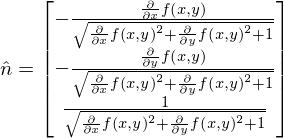

In [33]:
sp.Eq(nhat, derive_normal_vector_formula(f), evaluate=False)

This matches what was derived in the text. What about the others?

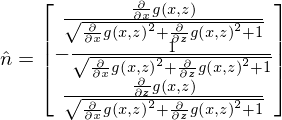

In [34]:
sp.Eq(nhat, derive_normal_vector_formula(g), evaluate=False)

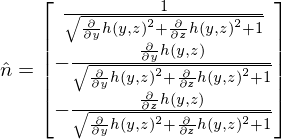

In [35]:
sp.Eq(nhat, derive_normal_vector_formula(h), evaluate=False)

To check the second part of the question, we need to repeat problem II-2, but with our new expressions for $\hat{\mathbf{n}}$.

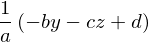

In [36]:
n_from_h = derive_normal_vector_formula(h)

a,b,c,d = sp.symbols('a b c d', real=True, positive=True)

plane = sp.Eq(a*x + b*y + c*z, d)

my_h = sp.solve(plane, x)[0]
my_h

Substitute $h(y,z)$ for the plane into our normal vector formula which uses $h$.

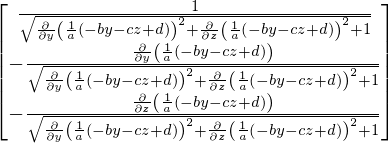

In [37]:
n_from_h.subs(h, my_h)

This includes unevaluated derivatives. To have `sympy` evaluate the derivatives, we use the `.doit()` method.

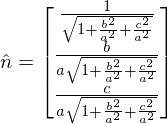

In [38]:
sp.Eq(nhat, n_from_h.subs(h, my_h).doit(), evaluate=False)

Comparing to the desired result...

In [39]:
sp.simplify(n_from_h.subs(h, my_h).doit()-desired_result.T)

So, it works.  

#### Summary: 

* This is the most challenging of the three types of homework problems. 

* Since I had to derive multiple expressions (one for $g(x,z)$ and one for $h(y,z)$), I decided to write a python function, but I could also have just gone through the steps by hand. Generally speaking, if I'm going to do something more than once, writing a function isn't a bad idea, but it's worth noting that a significant fraction of the work (the introspection and list comprehension pieces, in particular) were a direct result of my wanting to use a generalizable function, rather than just wading in and doing the operations by hand.

* Looking at --- or better still, testing --- intermediate and/or known results is an important part of the process here to make sure you haven't made a mistake. 

* Most of the notes I included in this problem were pedagogical, based on the assumption that at least some of my students wouldn't be able to follow what I was doing without explanation. If I were doing this for myself, I would have left out everything between inputs 22 and 28 except for the `import` statements.

* When I wrote the `derive_normal_vector_formula` function, I started with the comment lines, following Schey's treatment. That gave me a framework I could flesh out into the full function.

----

----
<a id="commentary"></a>
### Commentary

So, what is the appropriate role of `sympy` (or similar tools) in the upper level undergraduate physics curriculum? I'm not sure that I have an answer to that question, but here are some thoughts (in no particular order):

* The use of `sympy` makes problems of the "manipulation" and "derivation" types more complicated. The student must explicitly show intermediate steps, and will often need to think about computational issues rather than just the math or the physics. The question of exactly how best to test equality that cropped up in problem II-2 above is one example of this. 

* Problems of the "practice" type are more complicated the first time through, but are trivial after that, which robs them of some of their utility.

* For most students, using `sympy` adds a third layer of learning to the course: physics content, mathematical technique, and now computational syntax. For some, (perhaps most?) time and effort spent trying to master the computational bits will likely take away from mastery of the physics, the math, or both. 

* On the other hand, the work of teaching `sympy` how to derive new expressions or work through a particular set of manipulations forces the students to be more explicit in their reasoning.

* Solutions prepared in this way can easily be stored in a version control system for future reference, use, and improvement.

* Solutions prepared in this way are searchable (though appropriate keyword tags should be added to make such searching most effective).

* Legibility is not a concern, though writing understandable code certainly could be. This means more work for the students, but it's *useful, productive* work.

* Some students will likely be under the (dangerously mistaken) impression that they can rely on the tool to paper over their deficiencies in mathematical understanding. This complaint is often leveled at the use of calculators in the lower grades, and I have in fact seen students reach for a calculator to multiply by 10, which would seem to indicate that some concern on this front is warranted.  In this case, though, I think there are at least two mitigating factors. First, by the time students reach this point in the curriculum, they should have already developed expertise (or at the very least, coping strategies) in dealing with most of the operations that `sympy` handles in a straightforward way. Second, the more advanced mathematical operations (taking a curl, say, or evaluating a surface integral) which may be relatively new to them require enough work on the students' part to implement that they will need to understand the math to get `sympy` to carry it out. This is even more true for more subtle mathematical arguments (when and how to make use of the Divergence Theorem, for example).

* I have fond memories of *many* hours spent in the study rooms of the Harold B Lee Library at BYU hashing through problems with my classmates when I was an undergraduate student. While it is possible to collaborate on computer-based work, the dynamic is different from working problems as a group at a chalkboard. Perhaps this issue could be addressed by encouraging or requiring some amount of pair programming or something similar.


Ultimately, I think the plusses outweigh the minuses, which is why I'm pushing my students to use this tool this semester. I'll probably need to post an update when the year is done to say how things went.